# Insertion Sort vs Quick Sort  
###### Alessandro Aldo Raoul Bonciani - Matricola 7079209  
### Introduction to Sorting Algorithms  
A sorting algorithm is an algorithm that solve the following sorting problem:  
    **Input**: A sequence of $n$ numbers $<a_1, a_2, ..., a_n>$  
    **Output**: A permutation (reordering) $<a_1', a_2', ..., a_n'>$ of the input sequence such that $a_1' ≤ a_2' ≤ ... ≤ a_n'$  
    There are many sorting algorithms, each with its own advantages and limitations, based on: time complexity, space complexity, stability and the type of data to be sorted.  
    In this notebook we will focus on two simple sorting algorithms: **Insertion Sort** and **Quick Sort**.  
### Insertion Sort
**Insertion Sort** is a simple sorting algorithm that works by building a sorted portion of the list one element at a time. Its main idea is to take each element from the unsorted part of the list and insert it into its correct position within the sorted portion.  
    Here's a brief overview of how Insertion Sort works:  
    1. **Initialization**: The algorithm starts with the first element, assuming it's already sorted.  
    2. **Comparison and Insertion**: It then iterates through the unsorted portion of the list, comparing each element with the elements in the sorted portion. It finds the correct position for the current element within the sorted part and inserts it there.  
    3. **Expansion**: This process continues iteratively, with the sorted portion growing by one element in each iteration.  
    4. **Termination**: The algorithm terminates when the sorted portion of the list reaches the end of the list.

In [1]:
def InsertionSort(A):
    for j in range(2,len(A)):
        key = A[j]
        i = j - 1
        while i > 0 and A[i] > key:
            A[i + 1] = A[i]
            i = i - 1
        A[i + 1] = key

In [2]:
myArray=[9,4,5,8,2,12]
InsertionSort(myArray)
print(myArray)

[9, 2, 4, 5, 8, 12]


The time complexity of Insertion Sort is typically analyzed based on the number of comparisons and swaps it makes as it sorts an array of $n$ elements. Here's a breakdown of the complexity analysis:  
    - **Best-case time complexity**: when the input array is already sorted. In this case, Insertion Sort makes only $n - 1$ comparisons and $0$ swaps. Therefore, the best-case time complexity is $O(n)$.  
    - **Average-case time complexity**: when the input array is a random permutation of elements. In this case, Insertion Sort makes approximately $n^2/4$ comparisons and $n^2/4$ swaps. Therefore, the average-case time complexity is $O(n^2)$.  
    - **Worst-case time complexity**: when the input array is in reverse order, and each element needs to be compared and swapped with all the previous elements in the sorted portion of the array. In this case, Insertion Sort makes approximately $n^2/2$ comparisons and $n^2/2$ swaps. Therefore, the worst-case time complexity is $O(n^2)$.  
    The space complexity of Insertion Sort is $O(1)$, meaning it sorts the array in-place without requiring additional memory allocation proportional to the input size.  
    In summary, Insertion Sort has a best-case time complexity of $O(n)$, but its average-case and worst-case time complexity are both $O(n^2)$. It is not considered efficient for large datasets, but it can be adaptive and perform well on nearly sorted data or small datasets. 

### Quick Sort  

**Quick Sort** is a highly efficient sorting algorithm that divides the array into smaller sub-arrays, sorting each sub-array independently. It works by selecting a "pivot" element from the array and partitioning the other elements into two sub-arrays according to whether they are less than or greater than the pivot. The sub-arrays are then recursively sorted.  
    Here's a brief overview of how Quick Sort works:  
    1. **Partitioning**: The algorithm selects a pivot element from the array. The pivot can be chosen in different ways, such as selecting the first, last, or middle element. The array is then partitioned into two sub-arrays: one containing elements less than the pivot and the other containing elements greater than the pivot.  
    2. **Recursion**: The algorithm recursively sorts the sub-arrays created in the previous step.  
    3. **Combining**: As the recursive calls return, the sub-arrays are combined to form the final sorted array.  
    4. **Termination**: The algorithm terminates when the sub-arrays contain only one element, as single-element arrays are already sorted.

In [3]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def QuickSort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        QuickSort(arr, low, pi - 1)
        QuickSort(arr, pi + 1, high)

In [4]:
myArray=[12,2,4,9,7,5]
QuickSort(myArray, 0, len(myArray)-1)
print(myArray)

[2, 4, 5, 7, 9, 12]


The time complexity of Quick Sort depends on the choice of pivot and how well it divides the array into sub-arrays. 
   
-**Best-case time complexity**: When the partitioning is balanced, the time complexity is $\Theta(n\lg(n))$. We have this case when both partitions are $n/2$ long.  
-**Average-case time complexity**: In this case, the time complexity is $O(n\lg(n))$. In this case, the array is divided in 2 cuts: one in which both partitions are $n/2$ long and the other in which one partition has $1$ element, while the other has $n-1$. It has to be noted that it has the same time complexity of **Merge Sort**, but with smaller costants.  
-**Worst-case time complexity**: When the partitioning is unbalanced, the time compexity is $\Theta(n^2)$. We have this case when one partition has $1$ element, while the other has $n-1$.


In summary, Quick Sort is a highly efficient sorting algorithm that is widely used in practice for its average-case performance. However, its worst-case performance can be a concern, especially for certain types of input data.

### Time complexity comparison between insertion sort and quick sort before testing  
  
|                | Best-case | Average-case | Worst-case |  
|----------------|-----------|--------------|------------|  
| Insertion Sort | $\Theta(n)$    | $\Theta(n^2)$     | $\Theta(n^2)$   |  
| Quick Sort     | $\Theta(n\lg(n))$   | $O(n\lg(n))$     | $\Theta(n^2)$   |

### Tests description  
To test the performance of the two algorithms, we will conduct tests that analyze their behavior when faced with different types of inputs of varying sizes.  
  
We will use a function that will generate graphs showing the asymptotic behavior of the sorting algorithms. The function takes several parameters:

- ***algType*** indicates which sorting algorithm is being tested (0 for Insertion Sort, 1 for Quick Sort).
- ***insertType*** indicates the method of inserting values (0 for sequential, 1 for random).
- ***arrayDim*** represents the maximum size of the array on which the test is performed.
- ***plot*** is a boolean that decides whether to print the results immediately or save them for later use.

Depending on the input parameters, an array is allocated with progressively larger sizes sorted randomly or sequentially. Then, one of the sorting algorithms is called, and its execution time is measured. The formula used to obtain the points for the graph is: $y_n = (end_n - start_n)/n + y_{n-1}$

In [5]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import time
import random

def plotSortGraph(algType, insertType, arrayDim, plot=True):
    x, y = [], []
    for i in range(1, arrayDim, 5):
        x.append(i)
        A = np.arange(i) if insertType == 0 else random.sample(range(i), i)
        if algType == 0:
            start = time.perf_counter()
            InsertionSort(A)
            end = time.perf_counter()
        else:
            start = time.perf_counter()
            QuickSort(A, 0, len(A) - 1)
            end = time.perf_counter()
        z = y[-1] if (len(y) != 0) else 0
        y.append((end - start) / i + z)
    if plot:
        plt.plot(x, y)
        title = 'Insertion-Sort' if algType == 0 else 'Quick-Sort'
        title += ' on Ordered List ' if insertType == 0 else ' on Randomized List '
        title += str(arrayDim)
        plt.title(title)
        plt.show()
    else:
        return x, y

Let's perform the tests in cases where ***arrayDim*** is equal to 50, 100, 300, and 500.

# 50 elements 

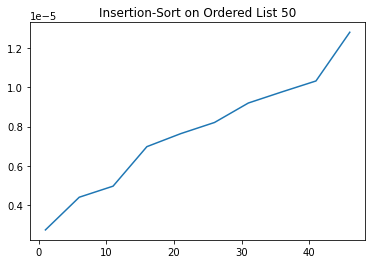

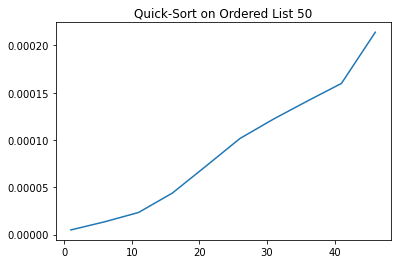

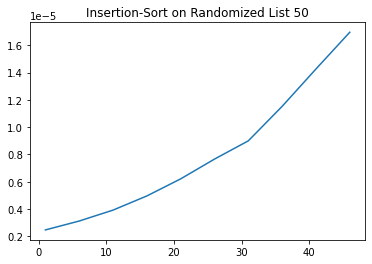

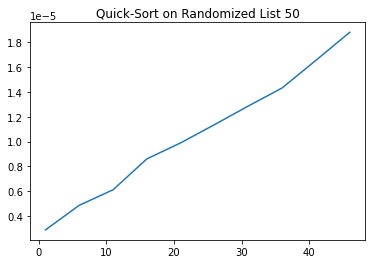

[[None, None], [None, None]]

In [6]:
[[plotSortGraph(i, j, 50) for i in range(2)] for j in range(2)]

# 100 elements

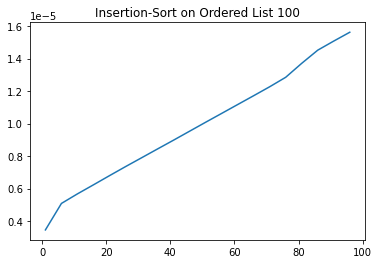

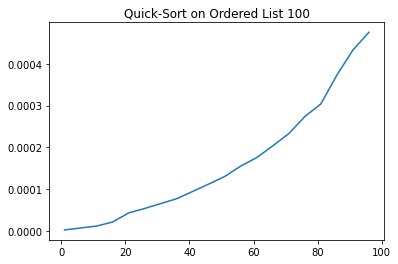

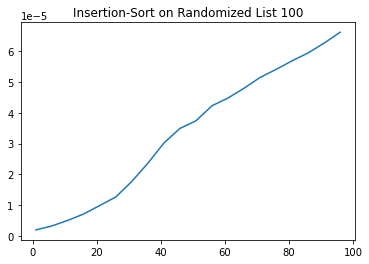

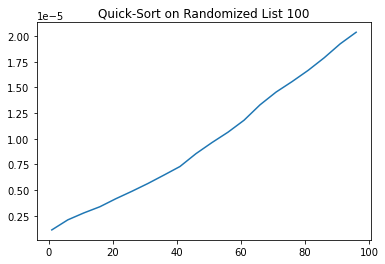

[[None, None], [None, None]]

In [7]:
[[plotSortGraph(i, j, 100) for i in range(2)] for j in range(2)]

# 300 elements

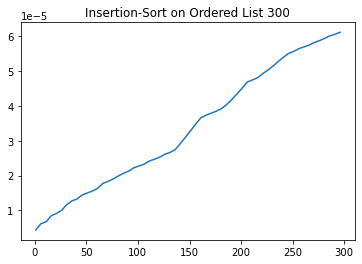

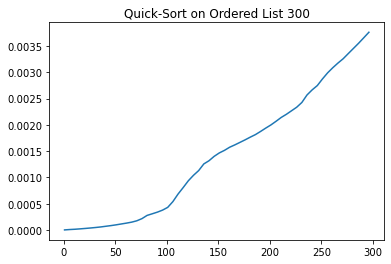

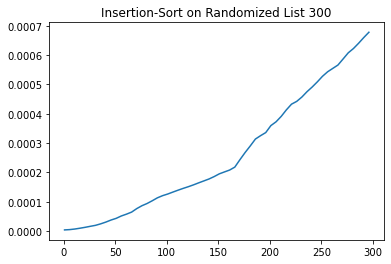

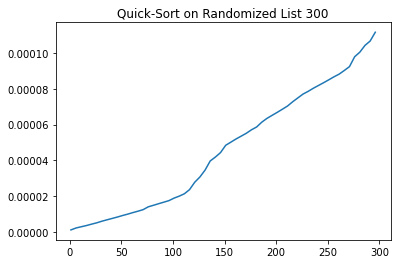

[[None, None], [None, None]]

In [8]:
[[plotSortGraph(i, j, 300) for i in range(2)] for j in range(2)]

# 500 elements

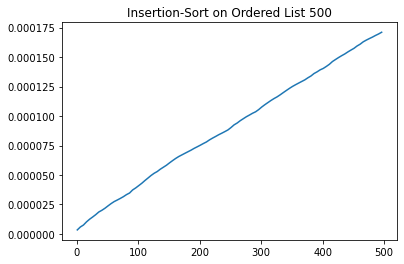

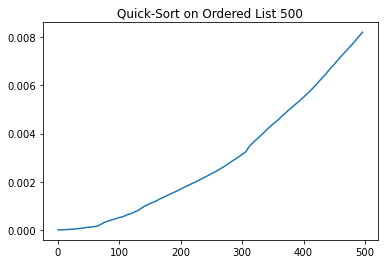

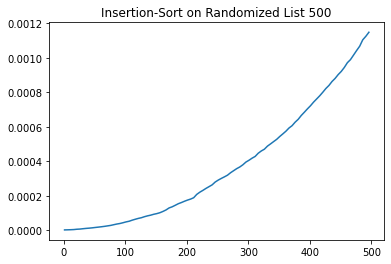

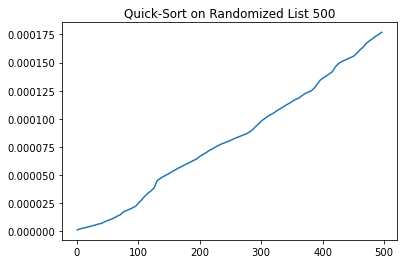

[[None, None], [None, None]]

In [9]:
[[plotSortGraph(i, j, 500) for i in range(2)] for j in range(2)]

On each test, the hypothesis were proven:  
-**The insertion sort** performed better on ordered lists, while being quadratic on randomized inputs;  
-**The quick sort**, on the other hand, performed in a quadratic way on ordered lists, while being better on randomized inputs.  

Let's see both the algorithms compared on a plot.  

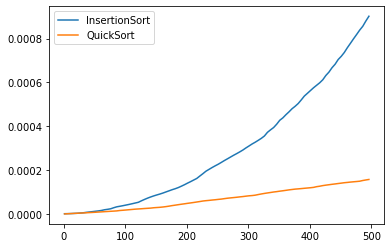

In [29]:
plt.plot(plotSortGraph(0, 1, 500, False)[0], plotSortGraph(0, 1, 500, False)[1], label='InsertionSort')
plt.plot(plotSortGraph(1, 1, 500, False)[0], plotSortGraph(1, 1, 500, False)[1], label='QuickSort')
plt.legend()
plt.show()

# Conclusions  
As expected, the results show that, on randomized inputs, the QuickSort is way faster than the InsertionSort on larger array sizes. It has to be noted that the Insertion Sort has a really good performance on sequential inputs.